# Generalized diffusion-relaxation model
Diffusionpy provides interfaces to consider relaxation phenomena during diffusion as it is often observed from diffusion in polymers.
This jupyter Noteboook reproduces the simulation results presented in the publication from Borrmann et al. (https://pubs.acs.org/doi/10.1021/acs.iecr.1c02359).
First, we import the relevant packages.

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt

Next, we define the standard inputs for modeling with diffusionpy (see the basics notebook).

In [2]:
nt=500
t=np.linspace(0.,4000.*60.,nt)
Mi=np.asarray([18.015,65000])
mobile=np.asarray([True,False])
Dvec=np.asarray([5E-14])
wi0=np.asarray([1E-3,1-1E-3])
wi8=np.asarray([0.1,0.9])
L=1E-5


It was assumed that the activity of the solvent changes linearly with the solvent concentration between starting and equillibrium cocnentration. Thus, the thermodynamic factor is approximated as a constants 

In [3]:
a10=np.asarray([0.001])
a18=np.asarray([0.25])
dlna1_dlnw1=(np.log(a10)-np.log(a18))/(np.log(wi0[0])-np.log(wi8[0]))
dlnai_dlnwi=np.asarray([[[dlna1_dlnw1[0],0.],[0.,1.]]]*len(t))

We model the first parameter study provided in the example in Figure 1 by Borrmann et al.. This serves as a reference showing the diffusion modeling without relaxation.

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0299249 seconds ----------------
------------- Initialization and postprocessing took 0.017725 seconds----------------


Text(22.29336197113284, 0.10000023182277565, 'Fickian(A)')

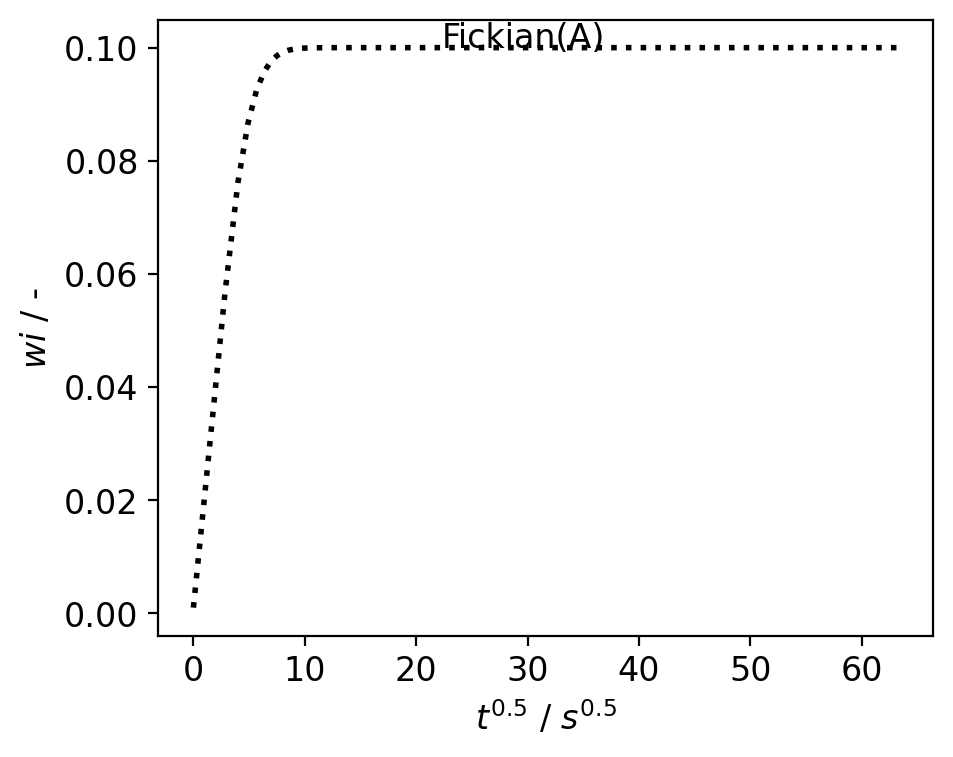

In [4]:
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,dlnai_dlnwi=dlnai_dlnwi)


font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

# color= ["#99CC00","#F08208","#99CDE9","#FFC0CB"]
color= ["#000000","#000000","#000000","#000000","#000000"]
label = ["Fickian(A)","Sigmoidal(B)","Two-Stage(C)","pseudo Fickian(D)","Hookean(E)"]
lines=[':','-','-.','--','-']
position=[nt//8,3,nt//8,nt//8,-30]

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax.set_xlabel('$t^{0.5}$ / $s^{0.5}$')
ax.set_ylabel('$wi$ / -')


ax.plot((t/60)**(1/2),wt[:,0], lines[0],color = color[0] , linewidth = 2.0,label=label[0])
ax.text((t[position[0]]/60)**(1/2), wt[position[0],0], label[0])

Next, we define the  the inputs for describinmg the relaxation. Relaxation is considered by modeling the generalized Maxwell mode. The user provides arrays of the E moduli and damper constants of the Maxwell elemts in the arrangement. here, define a single Maxwell element. The parameters for the diffusion relaxation m,odel are provided as additional keyword arguments

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 3.186258 seconds ----------------
------------- Initialization and postprocessing took 0.0195595 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2072987 seconds ----------------
------------- Initialization and postprocessing took 0.0186858 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.6498227 seconds ----------------
------------- Initialization and postprocessing took 0.0246852 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took

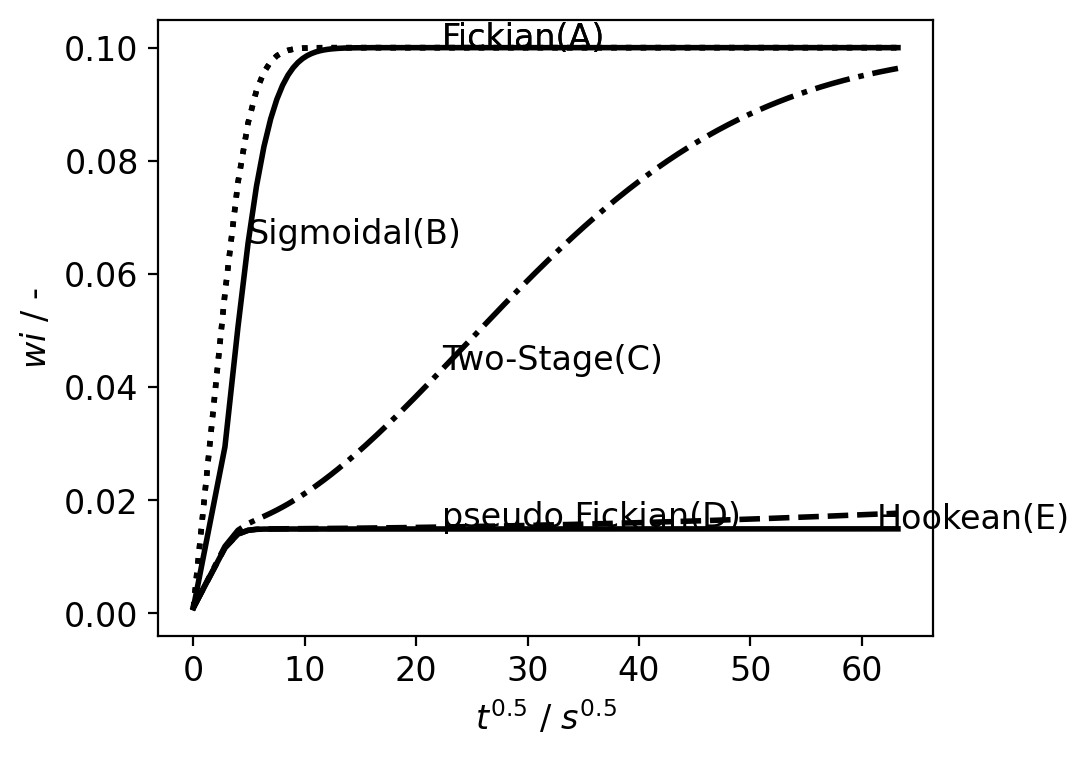

In [5]:
EJ=np.asarray([1E10])
etaJ=np.asarray([1E9])
exponent=np.asarray([0.])
rho0i=np.asarray([997.,1180])
etavec=np.asarray([1E9,1E12,1E14,1E16,1E18])
for i,etaJ in enumerate(etavec):
    wt,_=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,dlnai_dlnwi=dlnai_dlnwi,EJ=EJ,etaJ=etaJ,exponent=exponent,rho0i=rho0i)
    ax.plot((t/60)**(1/2),wt[:,0], lines[i],color = color[i] , linewidth = 2.0,label=label[i])
    ax.text((t[position[i]]/60)**(1/2), wt[position[i],0], label[i])
fig